# Importing libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

# Data Import

In [4]:
data=pd.read_csv("../temperature_data/imputed.csv")

In [5]:
data.head()

,Unnamed: 0,Region,Country,City,Month,Day,Year,AvgTemperature
0,0,Africa,Algeria,Algiers,1.0,1.0,1995.0,64.2
1,1,Africa,Algeria,Algiers,1.0,2.0,1995.0,49.4
2,2,Africa,Algeria,Algiers,1.0,3.0,1995.0,48.8
3,3,Africa,Algeria,Algiers,1.0,4.0,1995.0,46.4
4,4,Africa,Algeria,Algiers,1.0,5.0,1995.0,47.9


# Data Slicing

In [6]:
X=data.iloc[:,1:7]
y=data.iloc[:,7]

In [7]:
X.head()

,Region,Country,City,Month,Day,Year
0,Africa,Algeria,Algiers,1.0,1.0,1995.0
1,Africa,Algeria,Algiers,1.0,2.0,1995.0
2,Africa,Algeria,Algiers,1.0,3.0,1995.0
3,Africa,Algeria,Algiers,1.0,4.0,1995.0
4,Africa,Algeria,Algiers,1.0,5.0,1995.0


# Handling categorical encoders using Binary encoding

In [8]:

import category_encoders as ce
# ce_binary = ce.BinaryEncoder(cols = ['color'])

In [9]:
ce_binary = ce.BinaryEncoder(cols = ['Region','Country','City','Month','Day','Year'])

In [10]:
X=ce_binary.fit_transform(X, y)

In [11]:
y=y.iloc[:].values

# Data Splitting

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Linear regression modelling

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
y_pred = regressor.predict(X_test)
print("Root mean squared error value for linear regression model is {}".format(math.sqrt(mean_squared_error(y_test,y_pred))))
print("R-Squared value for linear regression model is {}".format(r2_score(y_test,y_pred)))

Root mean squared error value for linear regression model is 17.042543182418644
R-Squared value for linear regression model is 0.20277000172276505


# Random Forest Modelling

In [15]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [29]:
y_pred = regressor.predict(X_test)
print("Root mean squared error value for Random Forest model is {}".format(math.sqrt(mean_squared_error(y_test,y_pred))))
print("R-Squared value for Random Forest model is {}".format(r2_score(y_test,y_pred)))

Root mean squared error value for Random Forest model is 6.557893104857283
R-Squared value for Random Forest model is 0.8819561155176833


In [17]:
print(y_test[0:5])
print(y_pred[0:5])

[45.5 80.1 40.6 83.6 63.3]
[46.57 80.4  42.22 83.96 67.25]


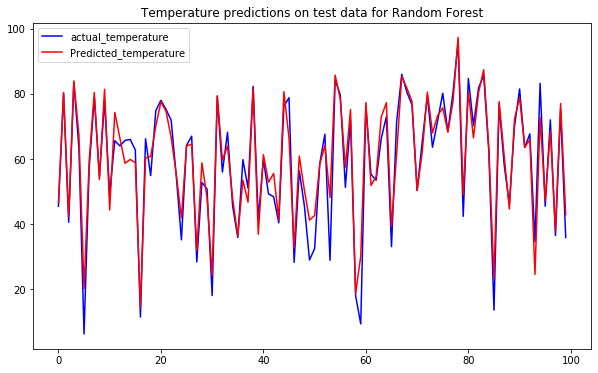

In [34]:
plt.figure(figsize=(10,6))
plt.plot(y_test[0:100], color='blue', label='actual_temperature')
plt.plot(y_pred[0:100] , color='red', label='Predicted_temperature')
plt.title('Temperature predictions on test data for Random Forest')


plt.legend()
plt.show()

# Predicting future values

In [110]:
Today=pd.DataFrame({"Region":["North America"],"Country":["US"],"City":["Dallas Ft Worth"],"Month":[9.0],"Day":[11.0],"Year":[2020.0]})
# X=ce_binary.transform([["North America","US","Austin",6.0,11.0,2020.0]])

In [111]:
sample=ce_binary.transform(Today)

In [112]:
y_pred = regressor.predict(sample)

In [113]:
y_pred

array([73.])

# XGboost modelling

In [ ]:
import xgboost as xgb
xgbr = xgb.XGBRegressor() 
xgbr.fit(X_train, y_train)
ypred = xgbr.predict(X_test)
mse = mean_squared_error(y_test,ypred)




In [31]:
print("Root mean squared error value XGboost model is {}".format(math.sqrt(mean_squared_error(y_test,ypred))))
print("R-Squared value for XGboost model is {}".format(r2_score(y_test,ypred)))

Root mean squared error value XGboost model is 8.0386136806183
R-Squared value for XGboost model is 0.8226312352138857


In [114]:
# from sklearn.ensemble import GradientBoostingRegressor 
# gbrt=GradientBoostingRegressor(n_estimators=100)
# gbrt.fit(X_train, y_train)
# y_pred=gbrt.predict(X_test) 
# print("R-squared for Train: %.2f" %gbrt.score(X_train, y_train))
# print("R-squared for Test: %.2f" %gbrt.score(X_test, y_test))

In [19]:
import matplotlib.pyplot as plt

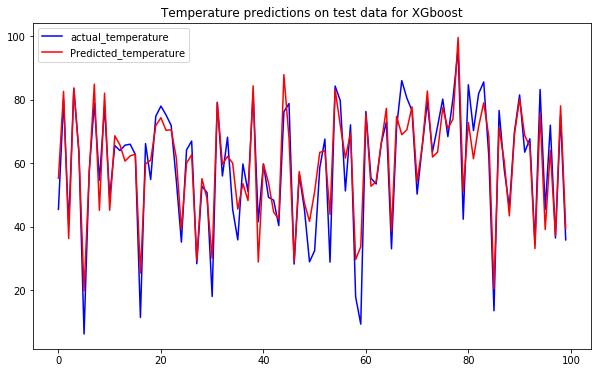

In [33]:
plt.figure(figsize=(10,6))
plt.plot(y_test[0:100], color='blue', label='actual_temperature')
plt.plot(ypred[0:100] , color='red', label='Predicted_temperature')
plt.title('Temperature predictions on test data for XGboost')


plt.legend()
plt.show()

# Predicting the temperature for 2020

In [115]:
data_2020=pd.read_csv("data_2020.csv")

In [117]:
data_2020=data_2020.iloc[:,1:]

In [119]:
twenty_20=ce_binary.transform(data_2020)

In [120]:
y_pred = regressor.predict(twenty_20)

In [123]:
data_2020['predicted_Average_temperature']=y_pred

In [125]:
data_2020.to_csv("predicted_2020.csv")